In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4
import matplotlib.pylab as pylab
import matplotlib.colors as mcolors
import h5py
import argparse
import pymap3d as pm
import os
import re
import matplotlib.patches as patches
import cartopy.feature as cfeature

# load style
plt.style.use("~/science.mplstyle")

In [4]:
# load US array data
USarray = pd.read_excel('../codes/_US-TA-StationList.xls')
USarrLon = USarray['LON'][::1]
USarrLat = USarray['LAT'][::1]

prediction = xr.open_dataset('../codes/prediction_all_US_array_2233.nc')
model_path = "/home/taufikmh/KAUST/spring_2022/global_pinns/01_clean_implementations/models/pretrained_USarr_div3_bl21_n512"
figures_path = model_path + '/'

prediction.V_pred_var.attrs['units'] = r'km2.s-2'
prediction.V_pred_var.values = prediction.V_pred_var.values / len(USarray)

prediction = prediction.assign(V_pred_std = prediction.V_pred_var ** 0.5)
prediction.V_pred_var.attrs['long_name'] = 'Var P-wave Velocity (Recovered)'
prediction.V_pred_std.attrs = prediction.V_pred_var.attrs
prediction.V_pred_std.attrs['long_name'], prediction.V_pred_std.attrs['units'] = 'Std P-wave Velocity (Recovered)', 'km.s-1'

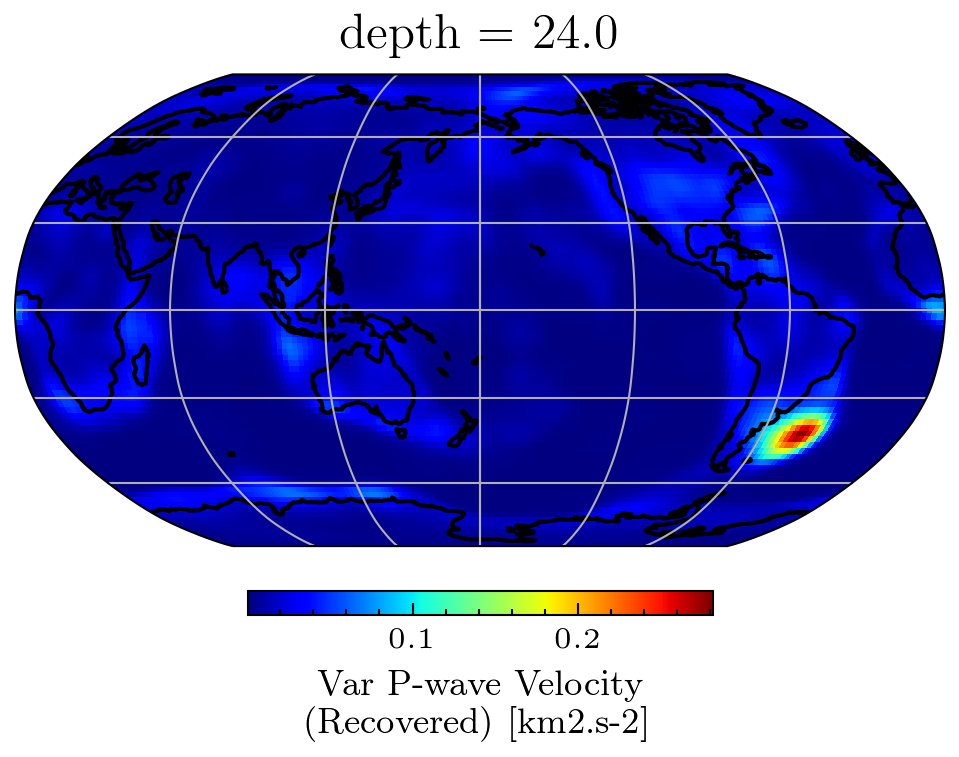

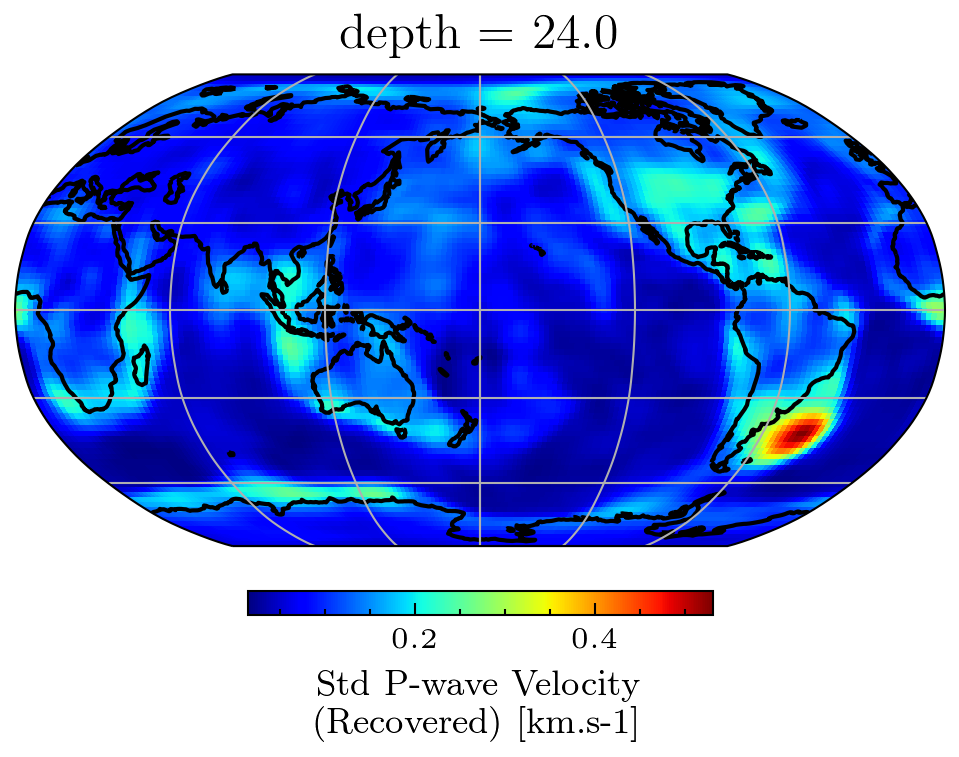

In [5]:
# Variance
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.axes(projection=ccrs.Robinson(180))

ax.coastlines()
ax.gridlines()
prediction.V_pred_var.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cbar_kwargs={'shrink': 0.5, 'extend':'neither', 'orientation':'horizontal','pad':0.05}, 
    cmap='jet',
)
plt.savefig(figures_path + 'V_pred_map_'+str(24)+'_var.png', bbox_inches="tight")

# Variance
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.axes(projection=ccrs.Robinson(180))

ax.coastlines()
ax.gridlines()
prediction.V_pred_std.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cbar_kwargs={'shrink': 0.5, 'extend':'neither', 'orientation':'horizontal','pad':0.05}, 
    cmap='jet',
)
plt.savefig(figures_path + 'V_pred_map_'+str(24)+'_std.png', bbox_inches="tight")

# Variance
fig = plt.figure(figsize=(4,4), dpi=300)
ax = plt.axes(projection=ccrs.Robinson(180))

ax.coastlines()
ax.gridlines()
prediction.V_pred_std.plot(
    ax=ax, 
    transform=ccrs.PlateCarree(), 
    cbar_kwargs={'shrink': 0.5, 'extend':'neither', 'orientation':'horizontal','pad':0.05}, 
    cmap='jet',
)
plt.savefig(figures_path + 'V_pred_map_'+str(24)+'_std.png', bbox_inches="tight")